# Data Introduction

In [103]:
#importing the essential libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [104]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [105]:
# loading the data
df = pd.read_csv("/content/drive/MyDrive/data.csv")

In [108]:
print(df.columns)

print('Number of the columns at first : ' , len(df.columns))

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')
Number of the columns at first :  25


In [80]:
#shape of our data
df.shape

(30697, 25)

In [81]:
# a berief sample of the data
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


# Cleaning and preprocessing the Data

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

## 1. Removing duplicates

### removing duplicate values for avoiding bias and ... in our training section.

In [83]:
df.drop_duplicates(inplace=True)

## 2. Standardize capitalization (all to lower case)

### Standardization of the string (object) data types.

In [84]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)

## 3. Handle missing values

### removing rows with the missing values or Nan, because this will make some troubles in the model training section.

# Data Visualization

### At first glance, we want to know the rate of success and failure shots made by kobe bryan.

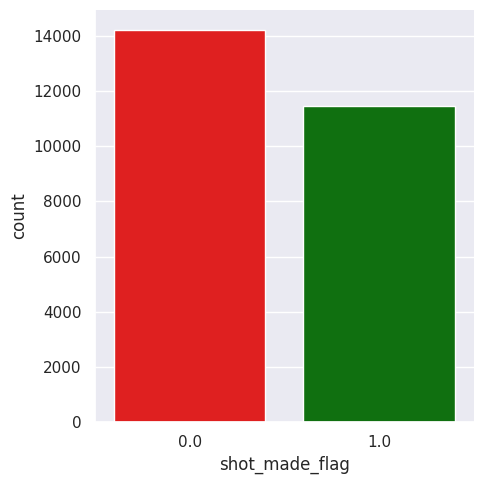

In [85]:
sns.catplot(data=df, x="shot_made_flag", kind="count", palette={0: "red",1: "green"})

### This the visualisation for success shot rate based on the shot location on the field with x and y parameters.

<Axes: xlabel='loc_x', ylabel='loc_y'>

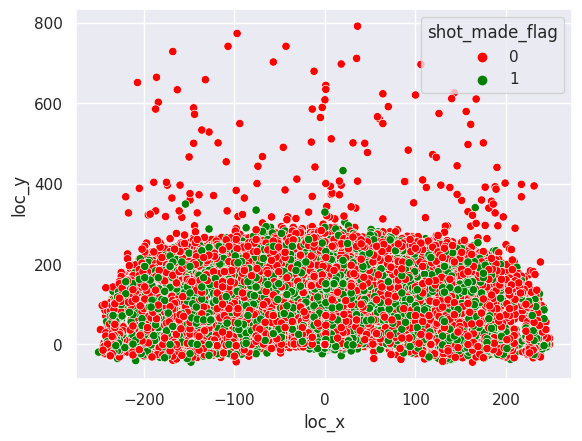

In [86]:
sns.scatterplot(data=df, x='loc_x', y='loc_y', hue='shot_made_flag', hue_order=[0,1],
                palette={0: "red",1: "green"})

#### This visualisation is for comparing the count of the success shots based on the time remaining for the match.

<Axes: xlabel='minutes_remaining', ylabel='count'>

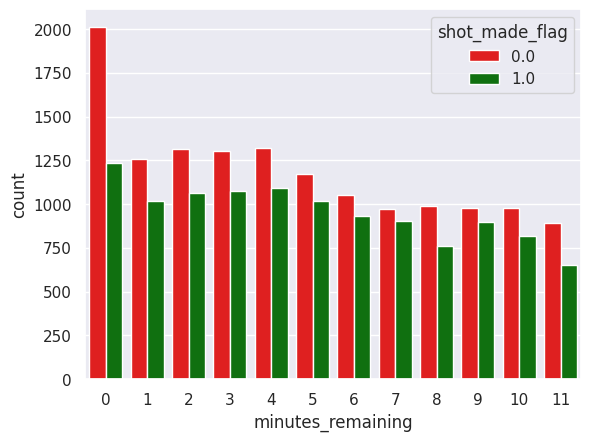

In [87]:
sns.countplot(data = df, x='minutes_remaining', hue='shot_made_flag',palette={0.0: "red",1.0: "green"})

#### This visualisation is for comparing the count of the success shots based on the shot zone.

<Axes: xlabel='shot_zone_area', ylabel='count'>

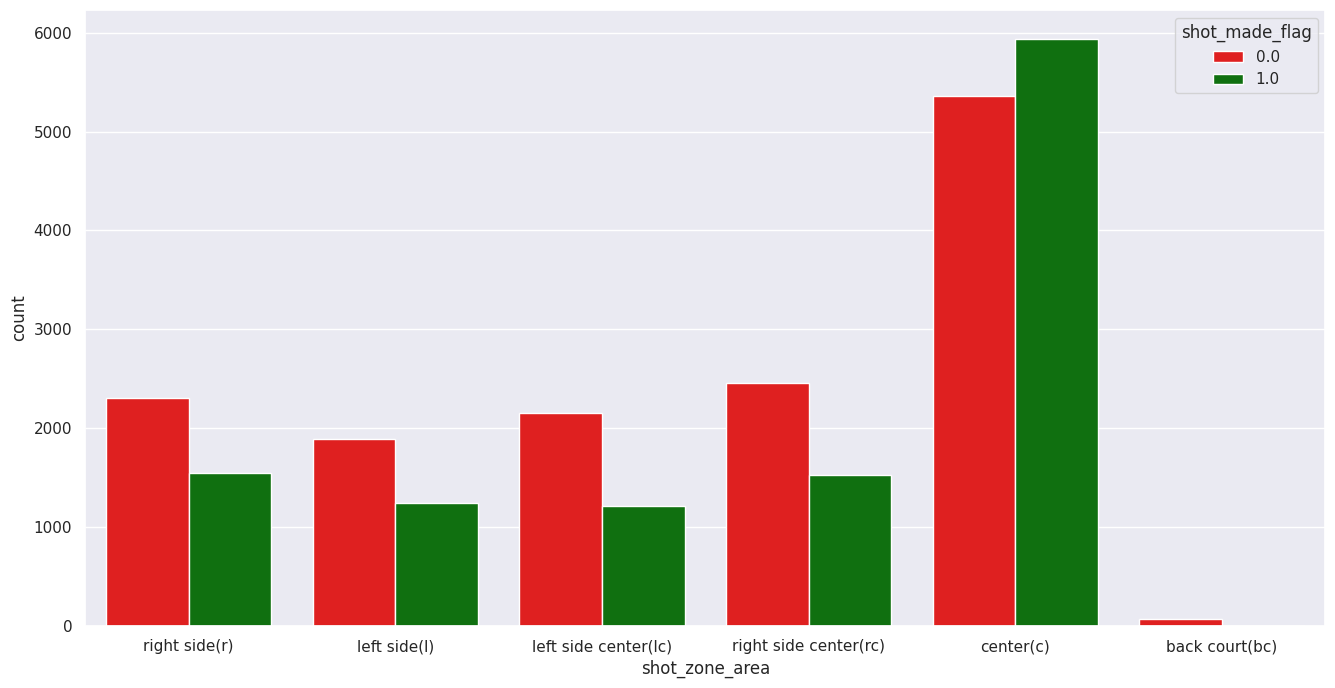

In [88]:
plt.figure(figsize=(16, 8))
sns.countplot(data = df, x='shot_zone_area', hue='shot_made_flag',palette={0.0: "red",1.0: "green"})

### In this visualisation, we show the shots success rate based on the opponent he played with.

<Figure size 1600x800 with 0 Axes>

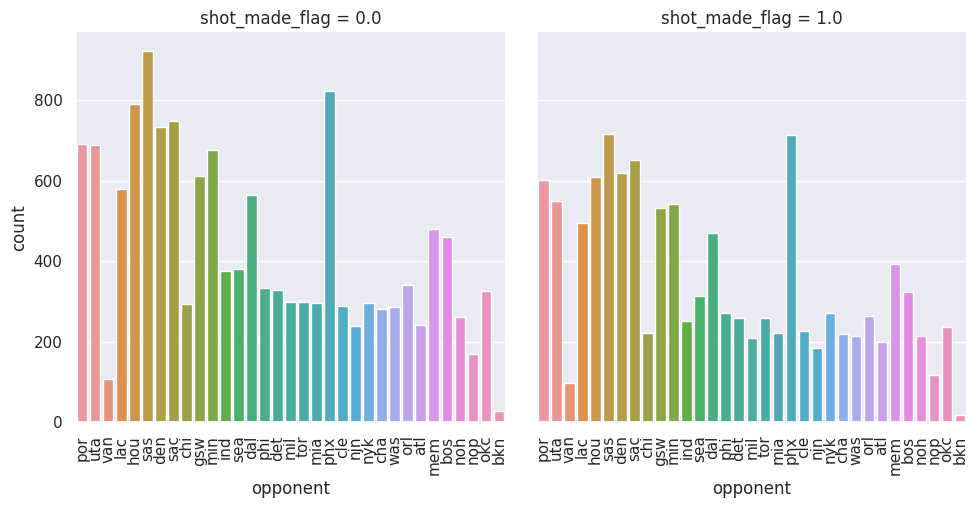

In [89]:
plt.figure(figsize=(16, 8))
plot = sns.catplot(data=df, x="opponent", col="shot_made_flag", kind="count", )
plot.set_xticklabels(rotation=90)
plt.show()

### here we want to show the shots success rate based on the year the cobe was playing

<Axes: xlabel='game_year', ylabel='count'>

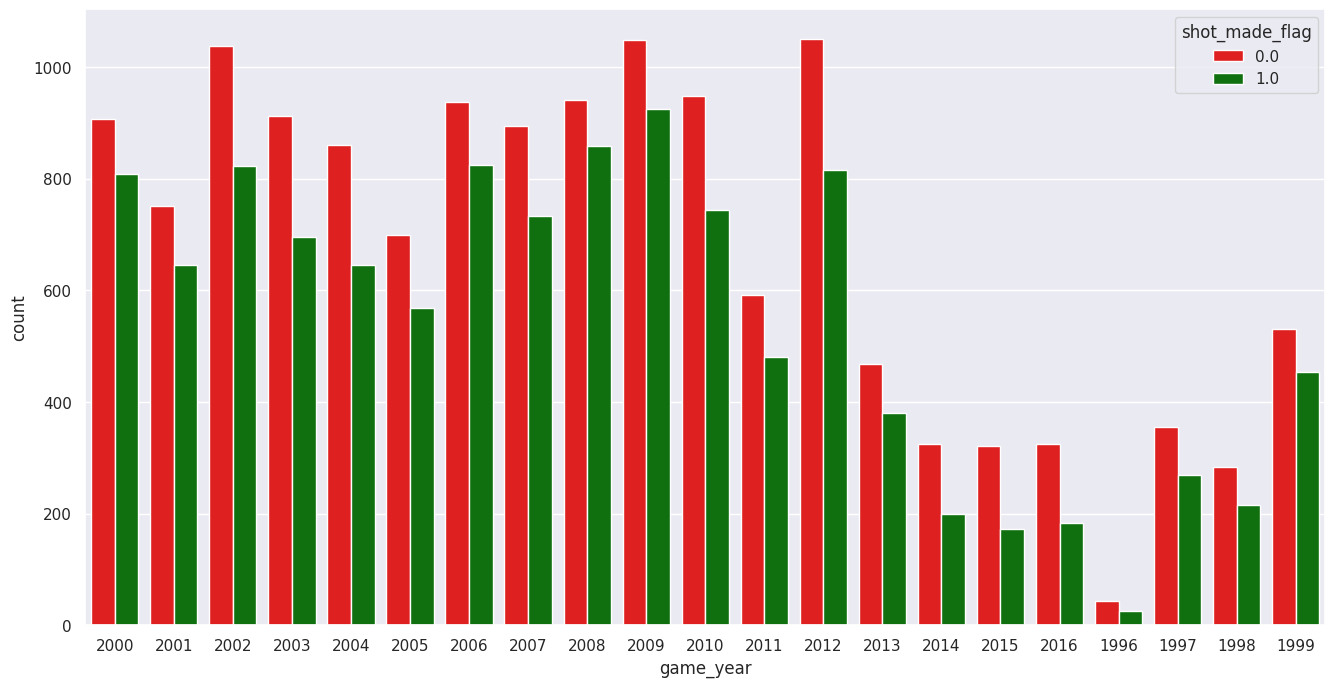

In [90]:

# adding a year column to the dataset
plt.figure(figsize=(16, 8))
df['game_year'] = df['game_date'].str.split('-', expand=True)[0]
df['game_month'] = df['game_date'].str.split('-', expand=True)[1]
sns.countplot(data = df, x='game_year', hue='shot_made_flag', palette={0.0: "red",1.0: "green"})

In [91]:
#df.to_csv('modified_data.csv', index=False)

# Feature Engineering

In [92]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'game_year', 'game_month'],
      dtype='object')

In [100]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,game_year,game_month,home
1,jump shot,jump shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2pt field goal,left side(l),mid-range,8-16 ft.,2000-10-31,por,2000,10,0
2,jump shot,jump shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2pt field goal,left side center(lc),mid-range,16-24 ft.,2000-10-31,por,2000,10,0
3,jump shot,jump shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2pt field goal,right side center(rc),mid-range,16-24 ft.,2000-10-31,por,2000,10,0
4,driving dunk shot,dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2pt field goal,center(c),restricted area,less than 8 ft.,2000-10-31,por,2000,10,0
5,jump shot,jump shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,0.0,2pt field goal,left side(l),mid-range,8-16 ft.,2000-10-31,por,2000,10,0


In [101]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,home
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,0.485854
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.499810
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,0.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,0.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.000000


In [94]:
df = df.drop(['team_name', 'team_id' , 'shot_id'], axis=1)

In [95]:
7# the matchup column provides information about the
# game pairing, specifying the teams involved and whether the game is at home or away

def hometest(row):

  if 'vs' in row['matchup']:
    return 1

  else:
    return 0

df['home'] = df.apply(lambda row : hometest(row) , axis = 1)
df.drop('matchup' , axis = 1 , inplace = True)

In [96]:
df.dropna(axis = 0, inplace  = True)

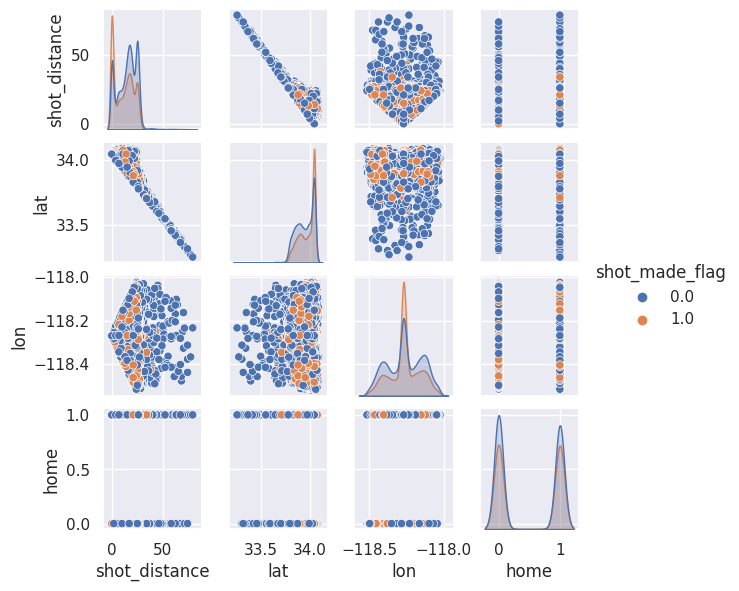

In [99]:
sns.pairplot(df[['shot_distance','lat','lon','home','game_year','shot_made_flag']], hue='shot_made_flag', height=1.5);

In [29]:
df["total_time_remaining"]=df["minutes_remaining"]*60+df["seconds_remaining"]+(4-df["period"])*60

In [30]:

from sklearn.preprocessing import OrdinalEncoder

distance_order = ['less than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'back court shot']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[distance_order], dtype=int)

new = ordinal_encoder.fit_transform(df[['shot_zone_range']])

df['shot_zone_range'] = new

In [31]:

#getting the distance of the shot
df["distance"] = df.apply(lambda row: 0.1*(row["loc_x"]**2 + row["loc_y"]**2)**0.5, axis = 1)

In [32]:
df['distance']
df.columns


Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'game_date', 'opponent', 'game_year', 'game_month', 'home',
       'total_time_remaining', 'distance'],
      dtype='object')

In [33]:
df.drop('opponent' , axis =1 )

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,game_year,game_month,home,total_time_remaining,distance
1,jump shot,jump shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2pt field goal,left side(l),mid-range,1,2000-10-31,2000,10,0,802,15.700000
2,jump shot,jump shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2pt field goal,left side center(lc),mid-range,2,2000-10-31,2000,10,0,645,16.860012
3,jump shot,jump shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2pt field goal,right side center(rc),mid-range,2,2000-10-31,2000,10,0,592,22.286543
4,driving dunk shot,dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2pt field goal,center(c),restricted area,0,2000-10-31,2000,10,0,499,0.000000
5,jump shot,jump shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2pt field goal,left side(l),mid-range,1,2000-10-31,2000,10,0,632,14.541664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,driving layup shot,layup,382,49900088,34.0443,0,0,-118.2698,7,4,...,2pt field goal,center(c),restricted area,0,2000-06-19,2000,06,1,424,0.000000
30692,jump shot,jump shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2pt field goal,center(c),in the paint (non-ra),0,2000-06-19,2000,06,1,365,4.801042
30694,running jump shot,jump shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2pt field goal,left side center(lc),mid-range,2,2000-06-19,2000,06,1,208,21.333542
30695,jump shot,jump shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3pt field goal,center(c),above the break 3,3,2000-06-19,2000,06,1,130,26.879360


In [34]:
df['loc_x'] = pd.cut(df['loc_x'], 25)
df['loc_y'] = pd.cut(df['loc_y'], 25)

In [35]:
# Replace 20 least common action types with value 'Other'
rare_action_types = df['action_type'].value_counts().sort_values().index.values[:20]
df.loc[df['action_type'].isin(rare_action_types), 'action_type'] = 'Other'
pd.get_dummies(df['action_type']).add_prefix('{}#'.format('action_type'))

,action_type#Other,action_type#alley oop dunk shot,action_type#alley oop layup shot,action_type#driving dunk shot,action_type#driving finger roll layup shot,action_type#driving finger roll shot,action_type#driving jump shot,action_type#driving layup shot,action_type#driving reverse layup shot,action_type#driving slam dunk shot,...,action_type#running dunk shot,action_type#running hook shot,action_type#running jump shot,action_type#running layup shot,action_type#slam dunk shot,action_type#step back jump shot,action_type#tip shot,action_type#turnaround bank shot,action_type#turnaround fadeaway shot,action_type#turnaround jump shot
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30694,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
30695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Game date
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year
df['game_month'] = df['game_date'].dt.month
df.drop('game_date', axis=1, inplace=True)

In [37]:
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(df[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    df.drop(cc, axis=1, inplace=True)
    df = df.join(dummies)

In [38]:
df

,game_event_id,game_id,lat,lon,minutes_remaining,playoffs,seconds_remaining,shot_distance,shot_made_flag,home,...,"loc_y#(457.0, 490.4]","loc_y#(490.4, 523.8]","loc_y#(523.8, 557.2]","loc_y#(557.2, 590.6]","loc_y#(590.6, 624.0]","loc_y#(624.0, 657.4]","loc_y#(657.4, 690.8]","loc_y#(690.8, 724.2]","loc_y#(724.2, 757.6]","loc_y#(757.6, 791.0]"
1,12,20000012,34.0443,-118.4268,10,0,22,15,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,20000012,33.9093,-118.3708,7,0,45,16,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,43,20000012,33.8693,-118.1318,6,0,52,22,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,155,20000012,34.0443,-118.2698,6,0,19,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
5,244,20000012,34.0553,-118.4148,9,0,32,14,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,382,49900088,34.0443,-118.2698,7,1,4,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
30692,397,49900088,33.9963,-118.2688,6,1,5,4,0.0,1,...,0,0,0,0,0,0,0,0,0,0
30694,426,49900088,33.8783,-118.4038,3,1,28,21,1.0,1,...,0,0,0,0,0,0,0,0,0,0
30695,448,49900088,33.7773,-118.2388,2,1,10,26,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:

df.drop('lat', axis=1, inplace=True) # Correlated with loc_x
df.drop('lon', axis=1, inplace=True) # Correlated with loc_y
df.drop('game_id', axis=1, inplace=True) # Independent
df.drop('game_event_id', axis=1, inplace=True) # Independent



In [40]:
y = df['shot_made_flag']
X = df.drop('shot_made_flag' , axis = 1 )


In [41]:
df.columns

Index(['minutes_remaining', 'playoffs', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'home', 'total_time_remaining', 'distance',
       'action_type#Other', 'action_type#alley oop dunk shot',
       ...
       'loc_y#(457.0, 490.4]', 'loc_y#(490.4, 523.8]', 'loc_y#(523.8, 557.2]',
       'loc_y#(557.2, 590.6]', 'loc_y#(590.6, 624.0]', 'loc_y#(624.0, 657.4]',
       'loc_y#(657.4, 690.8]', 'loc_y#(690.8, 724.2]', 'loc_y#(724.2, 757.6]',
       'loc_y#(757.6, 791.0]'],
      dtype='object', length=210)

# feature importance

# Chi2 Feature selection

In [42]:
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

X_minmax = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
feat_scored_20

array(['combined_shot_type#dunk', 'action_type#jump shot',
       'shot_zone_basic#restricted area', 'loc_x#(-10.96, 8.96]',
       'action_type#driving layup shot', 'shot_zone_range#0',
       'loc_y#(-10.6, 22.8]', 'action_type#slam dunk shot',
       'shot_type#3pt field goal', 'action_type#driving dunk shot',
       'shot_zone_area#center(c)', 'action_type#running jump shot',
       'shot_zone_range#3', 'shot_zone_basic#above the break 3',
       'combined_shot_type#layup', 'combined_shot_type#jump shot',
       'action_type#jump bank shot', 'action_type#pullup jump shot',
       'shot_zone_area#left side center(lc)', 'action_type#dunk shot'],
      dtype=object)

# Recursive Feature Elimination
Select 20 features from using recursive feature elimination (RFE) with logistic regression model.

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20

Index(['total_time_remaining', 'seconds_remaining', 'distance',
       'minutes_remaining', 'action_type#jump shot', 'shot_distance', 'home',
       'action_type#layup shot', 'period#3', 'period#1', 'period#2',
       'combined_shot_type#dunk', 'period#4', 'game_month#1', 'game_month#3',
       'game_month#2', 'game_month#12', 'game_month#4', 'game_month#11',
       'playoffs'],
      dtype='object')

# Variance Threshold
Find all features with more than 90% variance in values.

In [44]:
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = X.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold

Index(['minutes_remaining', 'playoffs', 'seconds_remaining', 'shot_distance',
       'home', 'total_time_remaining', 'distance', 'action_type#jump shot',
       'combined_shot_type#jump shot', 'combined_shot_type#layup', 'period#1',
       'period#2', 'period#3', 'period#4', 'shot_type#2pt field goal',
       'shot_type#3pt field goal', 'shot_zone_area#center(c)',
       'shot_zone_area#left side center(lc)', 'shot_zone_area#left side(l)',
       'shot_zone_area#right side center(rc)', 'shot_zone_area#right side(r)',
       'shot_zone_basic#above the break 3',
       'shot_zone_basic#in the paint (non-ra)', 'shot_zone_basic#mid-range',
       'shot_zone_basic#restricted area', 'shot_zone_range#0',
       'shot_zone_range#1', 'shot_zone_range#2', 'shot_zone_range#3',
       'game_month#1', 'game_month#2', 'game_month#3', 'game_month#4',
       'game_month#11', 'game_month#12', 'loc_x#(-10.96, 8.96]',
       'loc_y#(-10.6, 22.8]', 'loc_y#(22.8, 56.2]', 'loc_y#(123.0, 156.4]'],
      dtyp

In [45]:
#final feature names

features = np.hstack([
        feat_var_threshold,
        feat_imp_20,
        feat_scored_20
    ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-action_type#driving dunk shot
	-action_type#driving layup shot
	-action_type#dunk shot
	-action_type#jump bank shot
	-action_type#jump shot
	-action_type#layup shot
	-action_type#pullup jump shot
	-action_type#running jump shot
	-action_type#slam dunk shot
	-combined_shot_type#dunk
	-combined_shot_type#jump shot
	-combined_shot_type#layup
	-distance
	-game_month#1
	-game_month#11
	-game_month#12
	-game_month#2
	-game_month#3
	-game_month#4
	-home
	-loc_x#(-10.96, 8.96]
	-loc_y#(-10.6, 22.8]
	-loc_y#(123.0, 156.4]
	-loc_y#(22.8, 56.2]
	-minutes_remaining
	-period#1
	-period#2
	-period#3
	-period#4
	-playoffs
	-seconds_remaining
	-shot_distance
	-shot_type#2pt field goal
	-shot_type#3pt field goal
	-shot_zone_area#center(c)
	-shot_zone_area#left side center(lc)
	-shot_zone_area#left side(l)
	-shot_zone_area#right side center(rc)
	-shot_zone_area#right side(r)
	-shot_zone_basic#above the break 3
	-shot_zone_basic#in the paint (non-ra)
	-shot_zone_basic#mid-range
	-s

In [46]:
X = X.loc[:, features]
X.shape

(25697, 48)

# PCA ALGORITHM TO REDUCE THE DIMENTION OF THE DATA


Principal Component Analysis (PCA) is a dimensionality reduction
technique that can be used to reduce the number of features in your dataset while retaining most of the variance. To perform PCA and keep 95% of the variance, you can follow these steps:

In [47]:
X.dtypes

action_type#driving dunk shot              uint8
action_type#driving layup shot             uint8
action_type#dunk shot                      uint8
action_type#jump bank shot                 uint8
action_type#jump shot                      uint8
action_type#layup shot                     uint8
action_type#pullup jump shot               uint8
action_type#running jump shot              uint8
action_type#slam dunk shot                 uint8
combined_shot_type#dunk                    uint8
combined_shot_type#jump shot               uint8
combined_shot_type#layup                   uint8
distance                                 float64
game_month#1                               uint8
game_month#11                              uint8
game_month#12                              uint8
game_month#2                               uint8
game_month#3                               uint8
game_month#4                               uint8
home                                       int64
loc_x#(-10.96, 8.96]

# Handle **Imbalance** data


Handling imbalanced data using methods that generate synthetic data is a common approach to address the issue. One popular technique for this purpose is the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE works by creating synthetic examples in the feature space of the minority class, thereby balancing the class distribution. Here's a step-by-step guide on how to use SMOTE to handle imbalanced data:

In [48]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
#y_train_resampled.value_counts()    #check whether the data is balance or not

# Implement 3 different algorithm on data - Logistic regression - support vector machine and random forest

In [52]:
from sklearn.model_selection import  GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
# Assuming X_train_resampled and y_train_resampled are obtained using SMOTE
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the classifiers with default hyperparameters

lr_classifier = LogisticRegression(random_state=42 ,  max_iter=1000 , solver='sag')

# Fit the models

lr_classifier.fit(X_train_resampled_scaled, y_train_resampled )

# Evaluate the models on the training set

lr_accuracy_train = lr_classifier.score(X_train_resampled_scaled, y_train_resampled)

# Print the results

print(f'Logistic Regression Training Accuracy: {lr_accuracy_train:.4f}')

Logistic Regression Training Accuracy: 0.7048


Axes(0.1675,0.11;0.5775x0.77)
Confusion Matrix:
[[2410  477]
 [1180 1073]]
Precision: 0.6923
Recall: 0.4763
F1 Score: 0.5643
Test Accuracy: 0.6776


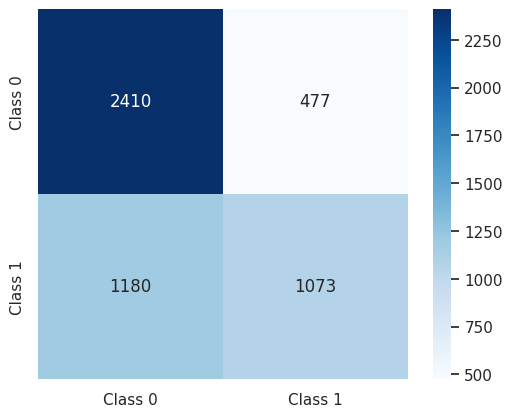

In [63]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming rf_classifier is the trained Random Forest model
# Assuming X_test_scaled is the scaled test set and y_test is the true labels

# Predictions on the test set

y_pred = lr_classifier.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(sns.heatmap(conf_matrix , annot = True , fmt="d", cmap="Blues", square=True,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1']))
print("Confusion Matrix:")
print(conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Test Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# random forest classifier

In [55]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42 , max_depth =9)

# Fit the Random Forest model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the results
print(f'Test Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')


Test Accuracy: 0.6825

Confusion Matrix:
[[2444  443]
 [1189 1064]]

Classification Report:


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_resampled_scaled, y_train_resampled)

y_pred = gb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the results
print(f'Test Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')

Test Accuracy: 0.6804

Confusion Matrix:
[[2409  478]
 [1165 1088]]

Classification Report:


# Voting ensemble

In [57]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

# Create sub models
estimators = []

estimators.append(('gbm', GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, max_features=15, warm_start=True, random_state=42)))
estimators.append(('rf', RandomForestClassifier(bootstrap=True, max_depth=8, n_estimators=200, max_features=20, criterion='entropy', random_state=42)))
estimators.append(('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1e-2, n_estimators=10, random_state=42)))

# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft', weights=[3,3,1])


Test Accuracy: 0.6829

Confusion Matrix:
Axes(0.1675,0.11;0.5775x0.77)

Classification Report:


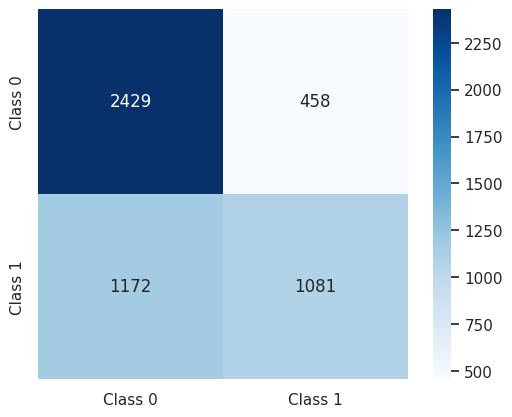

In [61]:
ensemble.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the results
print(f'Test Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(sns.heatmap(conf_matrix , annot = True , fmt="d", cmap="Blues", square=True,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1']))
print('\nClassification Report:')
